# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,"")

import matplotlib.pyplot as plt

# Define settings for graphics
plt.style.use('dark_background')

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /workspaces/data_ingestion/03_CoinGecko_WebAPI


## Get data

In [2]:
# Simple price endpoint with the required parameters
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 107906}}

In [3]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin'], vs_currencies='usd')

{'bitcoin': {'usd': 107906},
 'dogecoin': {'usd': 0.174408},
 'ethereum': {'usd': 3711.5},
 'near': {'usd': 2.0}}

In [4]:
# Multiple arguments (USD & EUR)
cg.get_price(ids=['bitcoin', 'near', 'ethereum, dogecoin'], vs_currencies=['usd', 'eur'])

{'bitcoin': {'usd': 107906, 'eur': 93709},
 'dogecoin': {'usd': 0.174408, 'eur': 0.151462},
 'ethereum': {'usd': 3711.5, 'eur': 3223.19},
 'near': {'usd': 2.0, 'eur': 1.74}}

In [5]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data

{'bitcoin': {'usd': 107906,
  'usd_market_cap': 2149536398605.9783,
  'usd_24h_vol': 47938865125.01584,
  'usd_24h_change': -2.871043773881106,
  'last_updated_at': 1762171577},
 'dogecoin': {'usd': 0.174408,
  'usd_market_cap': 26424596268.299778,
  'usd_24h_vol': 1864236836.2424934,
  'usd_24h_change': -6.639286266985573,
  'last_updated_at': 1762171582},
 'ethereum': {'usd': 3711.5,
  'usd_market_cap': 447865928107.75934,
  'usd_24h_vol': 30305915762.023403,
  'usd_24h_change': -4.534579213416723,
  'last_updated_at': 1762171577},
 'near': {'usd': 2.0,
  'usd_market_cap': 2562033228.5157523,
  'usd_24h_vol': 206668314.82753602,
  'usd_24h_change': -7.968307579998833,
  'last_updated_at': 1762171577}}

In [6]:
# Extract single values
names = list(data.keys())
print(names)
print("----------------")

# Price of the first element in list
print(names[0])
print(data[names[0]]["usd"])

['bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
bitcoin
107906


## Extract and plot data

In [7]:
# Keys from dictionary
names = list(data.keys())

# Get values from dictionary and format to 2 decimal places
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    formatted_val = f'{vals:.2f}'
    values.append(formatted_val)

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Value': values})

# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Sort DataFrame by 'Value' in descending order
df = df.sort_values(by='Value', ascending=False)

print(df)

       Name      Value
0   bitcoin  107906.00
2  ethereum    3711.50
3      near       2.00
1  dogecoin       0.17


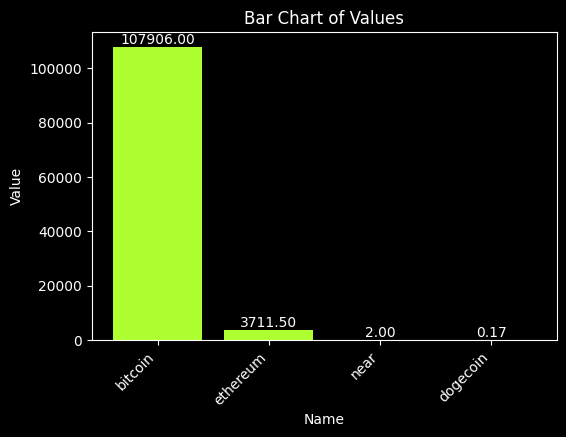

In [8]:
# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(df['Name'], df['Value'], color='greenyellow')
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Bar Chart of Values')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.05, f'{yval:.2f}', 
             ha='center', 
             va='bottom')
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-03 12:06:24
Python Version: 3.11.13
-----------------------------------
